# Augment False Positive Data

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import numpy as np
import glob

In [2]:
# get false positive images
path = './vehicle-detection-data/non-vehicles/false-positives'

false_positives = glob.glob(path + '/*.png')

print(len(false_positives))

103


In [3]:
# helper functions for affine transformations
# Image transformation
def affine_transform(img, ang_max, shear_max, trans_max):
    '''
    Apply random affine transformations on an image.
    
    Args:
        img: 1 image array with 3 channels.
        ang_max: integer value to represent max and min values for random
                 angle rotations.
        shear_max: integer value to represent max and min values for random
                   sheering.
        trans_max: integer value to represent max and min values for random
                   translation.
    
    '''
    
    rows = img.shape[0]
    cols = img.shape[1]
    
    # rotation
    rot = np.random.uniform(ang_max) - ang_max / 2
    rot_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rot , 1)

    # shearing
    pts1 = np.float32([[ 10, 10], [20, 10], [10, 20]])
    pt1 = 10 + shear_max * np.random.uniform() - shear_max / 2
    pt2 = 20 + shear_max * np.random.uniform() - shear_max / 2
    pts2 = np.float32([[pt1, 10], [pt2, pt1], [10, pt2]])
    shear_matrix = cv2.getAffineTransform(pts1, pts2)
    
    # translation
    trans_x = trans_max * np.random.uniform() - trans_max / 2
    trans_y = trans_max * np.random.uniform() - trans_max / 2
    trans_matrix = np.float32([[1 , 0, trans_x], [0 , 1, trans_y]])
    
    # affine transformations
    img = cv2.warpAffine(img, rot_matrix,(cols, rows))
    img = cv2.warpAffine(img, trans_matrix,(cols, rows))
    img = cv2.warpAffine(img, shear_matrix,(cols, rows))
    
    return img

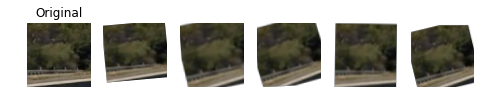

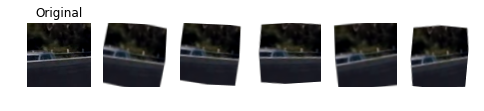

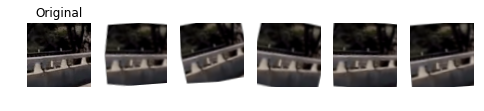

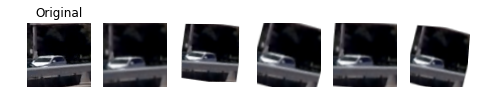

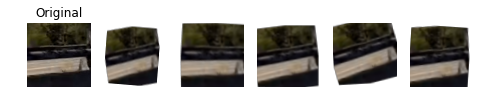

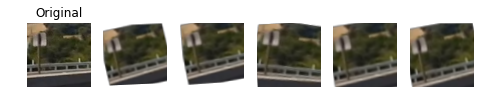

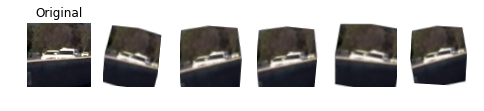

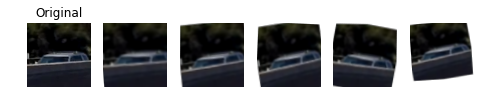

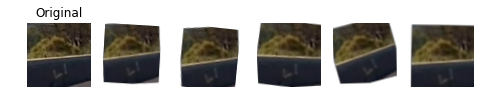

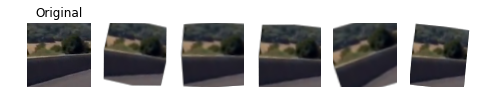

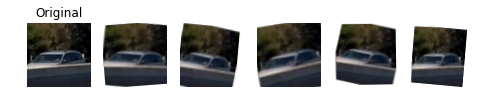

In [4]:
# augment by affine transformations
aug_images = []
for i,path in enumerate(false_positives):
    # read image
    img = mpimg.imread(path)
    # append original image
    aug_images.append(img)
    # apply random transformations for 5 times
    for j in range(5):
        # transform
        trans_img = affine_transform(img, 30, 2, 5)
        # append to list
        aug_images.append(trans_img)
    if i%10 == 0:
        plt.figure(figsize=(8,4))
        plt.subplot(1,6,1)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Original')
        for k in range(2,7):
            plt.subplot(1,6,k)
            plt.imshow(aug_images[-1*(k-1)])
            plt.axis('off')
        plt.show()
        plt.close()

In [5]:
# save augmented data
save_path = './vehicle-detection-data/non-vehicles/false-positives-augmented'

if not os.path.exists(save_path):
    os.makedirs(save_path)

for i in range(len(aug_images)):
    plt.imsave(save_path + '/' + str(i) + '.png', aug_images[i])